In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid


##################################################################################################################### SIMULACIÓN

L = 50  
N = 3000 
dx = L / N  
xi = np.linspace(-L / 2, L / 2, N)  
dt = 0.001  

##################################################################################################################### 


##################################################################################################################### FUNCIÓN DE ONDA INICIAL

xi0 = 2.5 
kappa_0 = 25 
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)
psi0_star = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(-1j * kappa_0 * xi)

##################################################################################################################### 

##################################################################################################################### POTENCIAL
alpha_param = 20
v_0 = 2 
b = 10  
v = v_0 * ( 1-1 / (1 + np.abs(xi / b)**alpha_param)) 
# v = v_0*np.where(np.abs(xi) <= b , 1, 0)
##################################################################################################################### 


##################################################################################################################### RANGO DE PROYECCIÓN

kmax = 50
kmin = 15

##################################################################################################################### 

print('CFL = ', ((1/kappa_0)/(dx**2)+kappa_0*v_0)*dt)




CFL =  0.194


In [146]:
def perform_momentum_measurement(psi, xi, N, kmax, kmin):
   
    dx = xi[1] - xi[0]  

    a = kmin
    b = kmax

    # TF para encontrar psi en espacio de k
    psi_k = np.fft.fft(psi) * dx  
    k_values = np.fft.fftfreq(N, d=dx)*2*np.pi

    # Producto por theta de heaviside
    positive_k_indices = (k_values > a) & (k_values < b)
    psi_k_positive = psi_k[positive_k_indices]
    
    # Conserva el tamaño del espacio
    psi_k_full = np.zeros(N, dtype=complex)
    psi_k_full[positive_k_indices] = psi_k_positive

    # Devuelve al espacio de xi
    psi_measured = np.fft.ifft(psi_k_full) # TF inversa

    # Normalizar
    normalization_factor = np.sqrt(trapezoid(np.abs(psi_measured)**2, xi))
    psi_measured /= normalization_factor

    return psi_measured

In [147]:
##################################################################################################################### CRANK NICOLSON

alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

diagonal_c = (1 + alpha) * np.ones(N)
off_diagonalx = -(alpha / 2) * np.ones(N - 1)
C = diags([off_diagonal, diagonal_c, off_diagonal], [-1, 0, 1], format="csr")

diagonal_d = (1 - alpha) * np.ones(N)
D = diags([-off_diagonalx, diagonal_d, -off_diagonalx], [-1, 0, 1], format="csr")

##################################################################################################################### 

In [148]:
def calculate_positive_kappa_probability(psi, xi, kmax , kmin):

    k = np.fft.fftfreq(len(xi), d=xi[1] - xi[0]) * 2 * np.pi

    psi_k = np.fft.fft(psi) * (xi[1] - xi[0])  
       
    positive_k_mask = (k > kmin) & (k < kmax )
    
    prob_positive_k = np.sum(np.abs(psi_k[positive_k_mask])**2)
    
    total_prob = np.sum(np.abs(psi_k)**2)
    
    return prob_positive_k / total_prob

In [149]:
def kinetic_energy(psi, xi):
    
    dx = xi[1] - xi[0]  
    
    d2psi_dx2 = np.gradient(np.gradient(psi, dx), dx)

    kinetic_energy = np.abs((1/kappa_0) * trapezoid(np.conjugate(psi) * d2psi_dx2, xi))
    
    return kinetic_energy

In [150]:
def potential_energy(psi, xi):

    potential_energy = np.abs((kappa_0) * trapezoid(np.conjugate(psi) * v * psi, xi))
    
    return potential_energy

In [151]:
def psi_en_momentos(psi, k):
    
    psi_k = np.fft.fft(psi) * dx

    return psi_k

t =  0.001
P =  1.0000000000000002
Medida num =  1
t =  0.002
P =  1.0000000000000002
Medida num =  2
t =  0.003
P =  1.0
Medida num =  3
t =  0.004
P =  1.0
Medida num =  4
t =  0.005
P =  1.0000000000000002
Medida num =  5
t =  0.006
P =  1.0000000000000004
Medida num =  6
t =  0.007
P =  1.0000000000000007
Medida num =  7
t =  0.008
P =  1.0000000000000009
Medida num =  8
t =  0.009000000000000001
P =  1.000000000000001
Medida num =  9
t =  0.010000000000000002
P =  1.0000000000000013
Medida num =  10
t =  0.011000000000000003
P =  1.0000000000000016
Medida num =  11
t =  0.012000000000000004
P =  1.0000000000000018
Medida num =  12
t =  0.013000000000000005
P =  1.000000000000002
Medida num =  13
t =  0.014000000000000005
P =  1.000000000000002
Medida num =  14
t =  0.015000000000000006
P =  1.0000000000000022
Medida num =  15
t =  0.016000000000000007
P =  1.0000000000000022
Medida num =  16
t =  0.017000000000000008
P =  1.0000000000000024
Medida num =  17
t =  0.0180000000000000

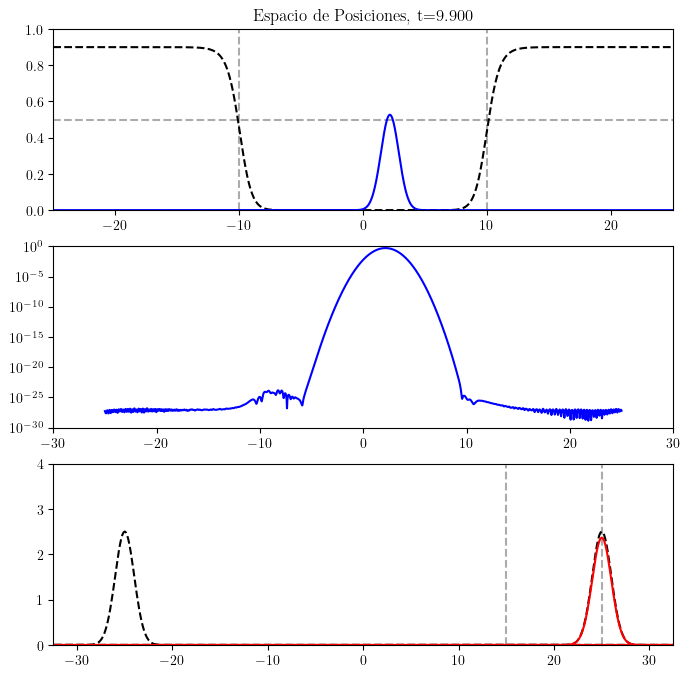

In [152]:
from matplotlib.animation import FuncAnimation 


##################################################################################################################### PARÁMETROS ANIMACIÓN 

t_max = 10
t_steps = int((t_max) / dt) 

num_frames = 180
steps_per_frame = t_steps // num_frames
 
 
##################################################################################################################### MEDICIONES

t_start = 0 # EMPIEZAN LAS MEDIDAS

t_final = 5 # ACABAN LAS MEDIDAS

num_mediciones = 10000 # NUMERO DE MEDIDAS

if num_mediciones == 1:

    momentos_de_medicion = [t_max]  # One measurement at t_max

else:

    momentos_de_medicion = np.linspace(t_final / num_mediciones+t_start, t_final, num_mediciones)

indice_medicion = 0 # CONTANDO MEDIDAS


##################################################################################################################### INICIALIZANDO

psi = psi0.copy()

psiref = psi0.copy()

psi_evolution = []

probs = []

k = np.fft.fftfreq(N, d=dx)*2*np.pi

psi_k = psi_en_momentos(psi,k)

psi_k_star = psi_en_momentos(psi0_star,k)

p = 1


##################################################################################################################### CONTROL LAYOUT ANIMACIÓN

fig, (ax_pos, ax_pos_log, ax_mom) = plt.subplots(3, 1, figsize=(8, 8))

######### POSICIONES

ax_pos.set_ylim(0,1)  # EJE Y
ax_pos.set_xlim (-L/2,L/2) # EJE X

######### LOG POSICIONES 

ax_pos_log.set_yscale ('log')
ax_pos_log.set_ylim([10**(-30), 1])  # EJE Y
ax_pos_log.set_xlim (-30,30)    # EJE X


######### MOMENTOS

ax_mom.set_ylim (0,4)    # EJE Y
ax_mom.set_xlim(-kappa_0-7.5, kappa_0+7.5) # EJE X

##################################################################################################################### POTENCIAL

ax_pos.plot(xi, (0.9)*v*(1/v_0), color='k', linestyle='--',alpha = 1 )


##################################################################################################################### LINEAS DE REFERENCIA
ax_mom.plot(k, np.abs(psi_k)**2, color= 'k', linestyle= '--', alpha = 1) # DIST MOMENTOS INICIAL

ax_mom.plot(k, np.abs(psi_k_star)**2, color= 'k', linestyle= '--', alpha = 1) # DIST MOMENTOS FINAL SIN MEDIDAS

ax_pos.axvline(x=b, color='k', linestyle='--', alpha=0.33)

ax_pos.axvline(x=-b, color='k', linestyle='--', alpha=0.33)

# ax_pos.axvline(x=-3*b, color='k', linestyle='--', alpha=0.33)

# ax_pos.axvline(x=3*b, color='k', linestyle='--', alpha=0.33)

# ax_pos.axvline(x=5*b, color='k', linestyle='--', alpha=0.33)

# ax_pos.axvline(x=-5*b, color='k', linestyle='--', alpha=0.33)

ax_mom.axvline(x=kappa_0, color='k', linestyle='--', alpha=0.33)

ax_mom.axvline(x=kmin, color='k', linestyle='--', alpha=0.33)

ax_mom.axvline(x=kmax, color='k', linestyle='--', alpha=0.33)

ax_pos.axhline(y=1/v_0, color='black', linestyle='--',alpha = 0.33)


##################################################################################################################### LINEAS 

line_pos, = ax_pos.plot(xi, np.abs(psi)**2 , color='blue')

line_pos1, = ax_pos.plot(xi, np.abs(psiref)**2, color='k', linestyle = '--', alpha = 0) # USADO PARA REFERENCIA 

line_posx, = ax_pos_log.plot(xi, np.abs(psi)**2 , color='blue')

line_mom, = ax_mom.plot(k, np.abs(psi_k)**2, color='red')


##################################################################################################################### UPDATER

def update(frame):
    global psi, indice_medicion, p, psiref, psi_evolution
    
    current_time = frame * steps_per_frame * dt  

    psi_evolution.append((current_time, np.abs(psi)**2))

    for _ in range(steps_per_frame):  

        psi = spsolve(A, B @ psi)
        psiref = spsolve(C, D @ psiref)

        current_time = current_time + dt
    
        if indice_medicion < len(momentos_de_medicion) and current_time >= momentos_de_medicion[indice_medicion]:
            print("t = ", current_time)

            p = p* calculate_positive_kappa_probability(psi, xi, kmax, kmin)
            print("P = ",p)

            psi = (np.sqrt(p))*perform_momentum_measurement(psi, xi, N, kmax, kmin)
            indice_medicion += 1  
            print("Medida num = ", indice_medicion)

    # Actualizar la densidad de probabilidad en espacio de posiciones
    line_pos.set_ydata(np.abs(psi)**2)
    line_posx.set_ydata(np.abs(psi)**2)
    line_pos1.set_ydata(np.abs(psiref)**2)

    # Calcular psi en el espacio de momentos y actualizar gráfica
    psi_k = psi_en_momentos(psi, k)
    line_mom.set_ydata(np.abs(psi_k)**2)

    # Actualizar los títulos
    ax_pos.set_title(f'Espacio de Posiciones, t={current_time:.3f}')
    # ax_mom.set_title(f'Espacio de Momentos, t={current_time:.3f}')
    
    return line_pos, line_mom, line_pos1, line_posx




##################################################################################################################### ANIMACIÓN

ani = FuncAnimation(fig, update, frames=num_frames, blit=True)

ani.save('animacion_pozo.mp4', writer='ffmpeg', fps=30)


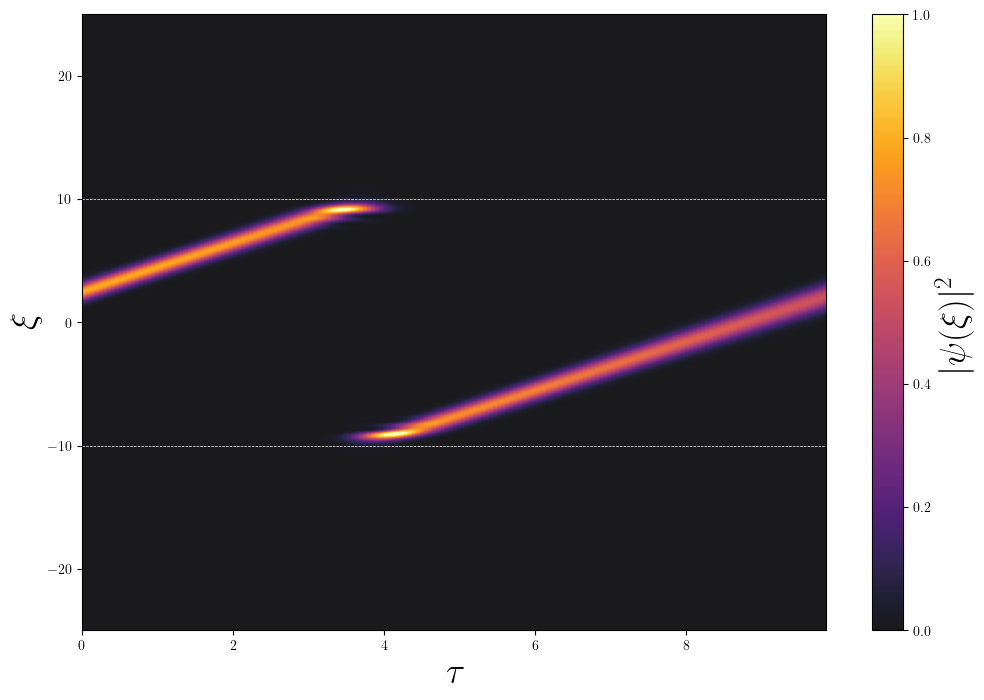

In [153]:
density_matrix = np.array([density_t for _, density_t in psi_evolution]).T

times = [t for t, _ in psi_evolution]  # Extraer los tiempos de la lista de tuplas
positions= xi

from matplotlib import rcParams
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib.pyplot si no lo has hecho

# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font

# Crear la figura
plt.figure(figsize=(12, 8))

# Mapa de calor para la barrera alta (colormap 'inferno' y rango consistente)
im = plt.imshow(density_matrix, aspect='auto', cmap='inferno', origin='lower', 
                extent=[times[0], times[-1], positions[0], positions[-1]], 
                alpha=0.9, vmin=0, vmax=1)

# Líneas horizontales
plt.axhline(y=-b, color='white', linestyle='--', linewidth=0.5)
plt.axhline(y=b, color='white', linestyle='--', linewidth=0.5)

# Añadir una barra de color para el mapa
cbar = plt.colorbar(im)
cbar.set_label(r"$|\psi(\xi)|^2$", fontsize=26)

# Etiquetas de los ejes
plt.xlabel(r"$\tau$", fontsize=26)
plt.ylabel(r"$\xi$", fontsize=26)

# Mostrar el gráfico
plt.show()

In [154]:
def calcular_centros_y_fwhms(matriz_psi2, x):
    
    # Inicializar arrays para los resultados
    T = matriz_psi2.shape[1]  # Número de columnas (tiempos)
    centros = np.zeros(T)
    fwhms = np.zeros(T)

    # Iterar por cada columna (cada tiempo t)
    for i in range(T):  # Itera por columnas (tiempos t)
        psi2 = matriz_psi2[:, i]  # Densidad de probabilidad en el tiempo t (columna i)

        # Centro como promedio ponderado de las posiciones x
        centro = np.sum(x * psi2) / np.sum(psi2)
        centros[i] = centro
        
        # FWHM
        max_val = np.max(psi2)
        half_max = max_val / 2
        indices = np.where(psi2 >= half_max)[0]  # Índices donde |psi|² >= mitad del máximo
        
        # Calcular FWHM
        if len(indices) >= 2:
            fwhm = x[indices[-1]] - x[indices[0]]
        else:
            fwhm = 0.0  # FWHM no definido si no hay suficientes puntos
        fwhms[i] = fwhm

    return centros, fwhms

def potential_energy2(psi2, xi):

    potential_energy = np.abs((kappa_0) * trapezoid(v* psi2, xi))
    
    return potential_energy


In [155]:
def encontrar_abscisas_cercanas(y_values, x_values, b):
    
    # Convertir las listas a arrays de numpy para facilitar el manejo de índices
    y_values = np.array(y_values)
    x_values = np.array(x_values)
    
    # Encontrar la abscisa más cercana a y = b
    idx_b = np.argmin(np.abs(y_values - b))  # Índice donde el valor de la función es más cercano a b
    
    # Encontrar la abscisa más cercana a y = -b
    idx_neg_b = np.argmin(np.abs(y_values + b))  # Índice donde el valor de la función es más cercano a -b

    # Devolver las abscisas más cercanas a b y -b
    abscisa_cercana_a_b = x_values[idx_b]
    abscisa_cercana_a_neg_b = x_values[idx_neg_b]
    
    return abscisa_cercana_a_b, abscisa_cercana_a_neg_b



# Función para hacer la extrapolación de la recta
def extrapolar_recta(x_data, y_data, num_puntos_extra=10):
    # Ajuste lineal sobre los primeros puntos (por ejemplo, los primeros 10)
    num_puntos_ajuste = 30  # Número de puntos a utilizar para el ajuste inicial
    x_ajuste = x_data[:num_puntos_ajuste]
    y_ajuste = y_data[:num_puntos_ajuste]

    # Realizar el ajuste lineal (regresión lineal)
    coeficientes = np.polyfit(x_ajuste, y_ajuste, 1)  # 1 es el grado de la recta
    pendiente, intercepto = coeficientes

    # Extrapolar la recta más allá de los datos originales
    x_extrapolado = np.linspace(x_data[0], x_data[-1] + num_puntos_extra, num_puntos_extra + len(x_data))
    y_extrapolado = pendiente * x_extrapolado + intercepto
    
    return pendiente, intercepto


def encontrar_puntos_cambio(abcisas, valores_funcion, umbral_cambio=0.1):
    # Calcular la derivada primera (pendiente) de la función
    derivada1 = np.gradient(valores_funcion, abcisas)
    
    # Calcular el cambio en la pendiente (derivada de la primera derivada)
    cambio_pendiente = np.gradient(derivada1, abcisas)
    
    # Buscar los puntos donde el cambio en la pendiente supera un umbral
    puntos_cambio = []
    for i in range(1, len(cambio_pendiente)):
        if abs(cambio_pendiente[i]) > umbral_cambio:
            # Guardar el punto y el valor de la función en ese punto de cambio
            puntos_cambio.append((abcisas[i], valores_funcion[i]))
    
    return puntos_cambio


def encontrar_puntos_cambio(abcisas, valores_funcion, umbral_cambio=0.1):
    # Calcular la derivada primera (pendiente) de la función
    derivada1 = np.gradient(valores_funcion, abcisas)
    
    # Calcular el cambio en la pendiente (derivada de la primera derivada)
    cambio_pendiente = np.gradient(derivada1, abcisas)
    
    # Buscar los puntos donde el cambio en la pendiente supera un umbral
    puntos_cambio = []
    for i in range(1, len(cambio_pendiente)):
        if abs(cambio_pendiente[i]) > umbral_cambio:
            # Guardar el punto y el valor de la función en ese punto de cambio
            puntos_cambio.append((abcisas[i], valores_funcion[i]))
    
    return puntos_cambio

1.9432581568591536 1.9432581562220195


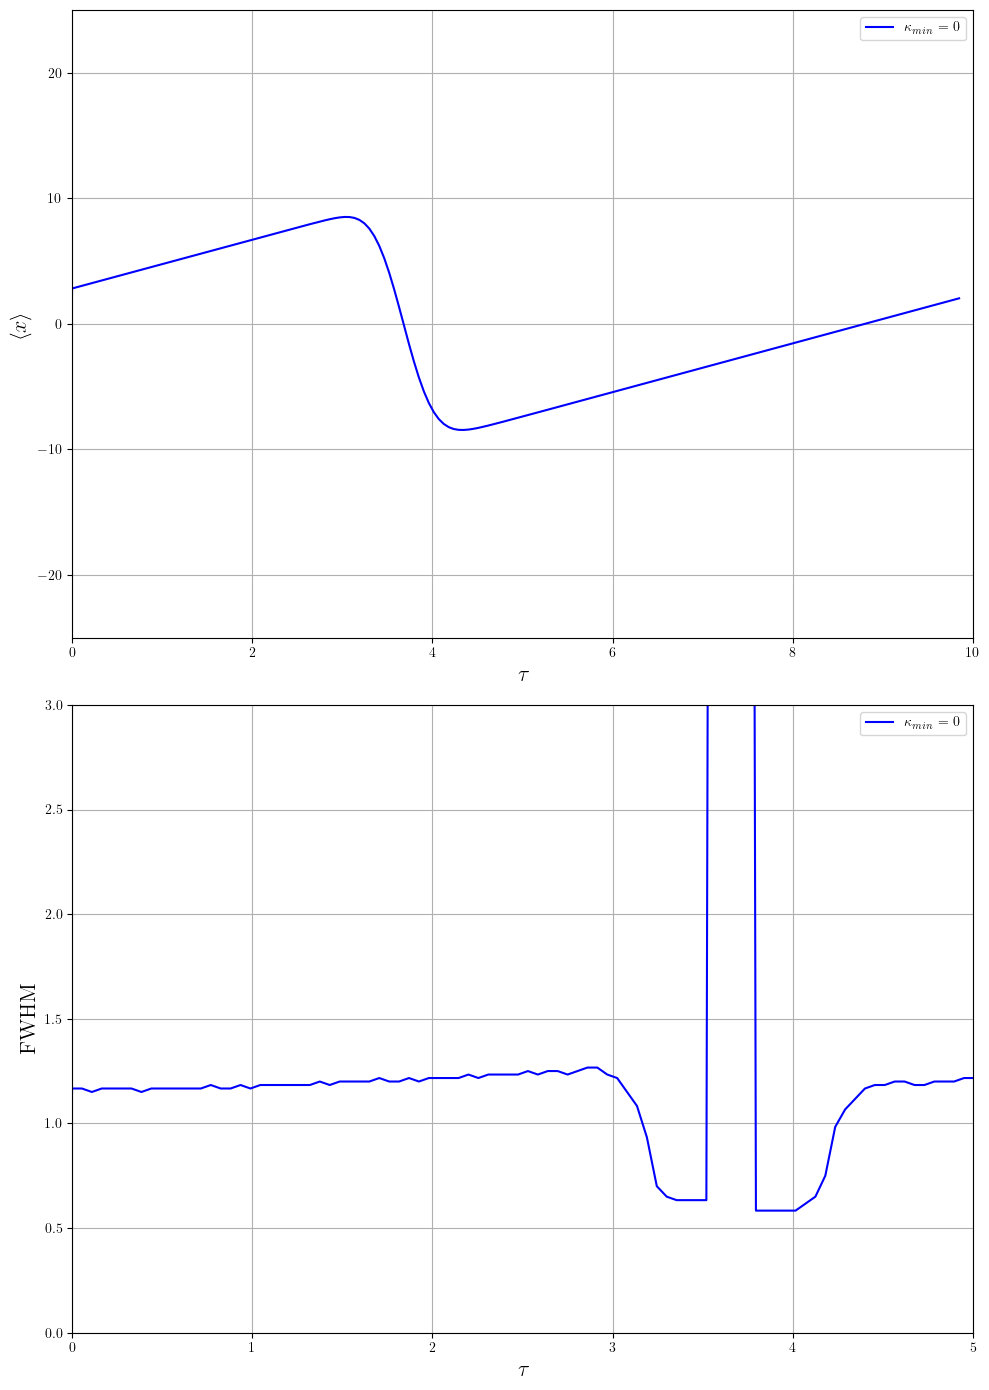

In [156]:
import matplotlib.pyplot as plt

centros, fwhms = calcular_centros_y_fwhms(density_matrix, xi)



energies = []

T = density_matrix.shape[1]

for i in range(T):
    psi2 = density_matrix[:, i]
    energies.append(potential_energy2(psi2, xi))


pendiente1, intercepto1= extrapolar_recta(times[:30], centros[:30], num_puntos_extra=10)
pendiente2, intercepto2= extrapolar_recta(times[-50:], centros[-50:], num_puntos_extra=10)


# extrap1 = []
# extrap2 = []

# for time in times:
#     extrap1.append(pendiente1*time + intercepto1)
#     extrap2.append(pendiente2*time + intercepto2)

umbral_cambio = 0.15

# t1 = encontrar_puntos_cambio(times, centros, umbral_cambio) [0][0]
# t2 = encontrar_puntos_cambio(times, centros, umbral_cambio) [-1][0]







# Crear figura con 3 subgráficos (1 fila y 3 columnas)
fig, axs = plt.subplots(2, 1, figsize=(10, 14))

pendiente1, intercepto = extrapolar_recta(times[-20:], centros[-20:], num_puntos_extra=10)

print(pendiente1, pendiente2)

plt.title 
# Subgráfico 1: Centro en función del tiempo
axs[0].plot(times, centros, label=r'$\kappa_{min}$ = 0', color='blue')



# axs[0].axhline(y=x1, color='k', linestyle='--')  
# axs[0].axhline(y=x2, color='k', linestyle='--') 
# axs[0].axhline(y=b, color='r', linestyle='-',alpha = 0.35  )  
# axs[0].axhline(y=-b, color='r', linestyle='-', alpha = 0.35 )  
# axs[0].axvline(x=t2, color='k', linestyle='--', label=f't = {t2}')  
# axs[0].axvline(x=t1, color='k', linestyle='--', label=f't = {t2}')  
# tpos, tneg = encontrar_abscisas_cercanas(centros, times, b)
# axs[0].axvline(x=tpos, color='r', linestyle='-',alpha = 0.35)  
# axs[0].axvline(x=tneg, color='r', linestyle='-',alpha = 0.35)  
axs[0].set_xlabel(r"$\tau$", fontsize=16)
axs[0].set_ylabel(r"$\left\langle x\right\rangle$", fontsize=16)
axs[0].set_xlim(0, t_max)
axs[0].set_ylim(-L/2, L/2)
axs[0].grid(True)
axs[0].legend()


# Subgráfico 2: FWHM en función del tiempo
axs[1].plot(times, fwhms, label=r'$\kappa_{min}$ = 0', color='blue')
# axs[1].axhline(y=2*b, color='k', linestyle='--', label='y = 2b')  # Línea en y = 2b

# ajustar recta al FWHM
pendiente, intercepto = extrapolar_recta(times, fwhms, num_puntos_extra=10)
recta = []
for time in times:  
    recta.append (pendiente*time+intercepto)


# axs[1].plot(times, recta, color='k', linestyle = '--', alpha = 1)
axs[1].set_xlabel(r"$\tau$", fontsize=16) 
axs[1].set_xlim(0, 5) 
axs[1].set_ylim(0, 3) 
# axs[1].axvline(x=t2, color='k', linestyle='--', label=f't = {t2}')  # Línea vertical en t2
# axs[1].axvline(x=t1, color='k', linestyle='--', label=f't = {t1}')  # Línea vertical en t1
axs[1].set_ylabel('FWHM', fontsize=16)
axs[1].grid(True)
axs[1].legend()

# # Subgráfico 3: Energía en función del tiempo
# axs[2].plot(times, energies, label='Energía', color='green')
# axs[2].axhline(y=2*b, color='k', linestyle='--', label='y = 2b')  # Línea en y = 2b
# axs[2].set_xlabel('Tiempo t')
# axs[2].axvline(x=t2, color='k', linestyle='--', label=f't = {t2}')  # Línea vertical en t2
# axs[2].axvline(x=t1, color='k', linestyle='--', label=f't = {t1}')  # Línea vertical en t1
# axs[2].set_ylabel('Energía')
# axs[2].grid(True)
# axs[2].legend()



# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar todos los subgráficos
plt.show()

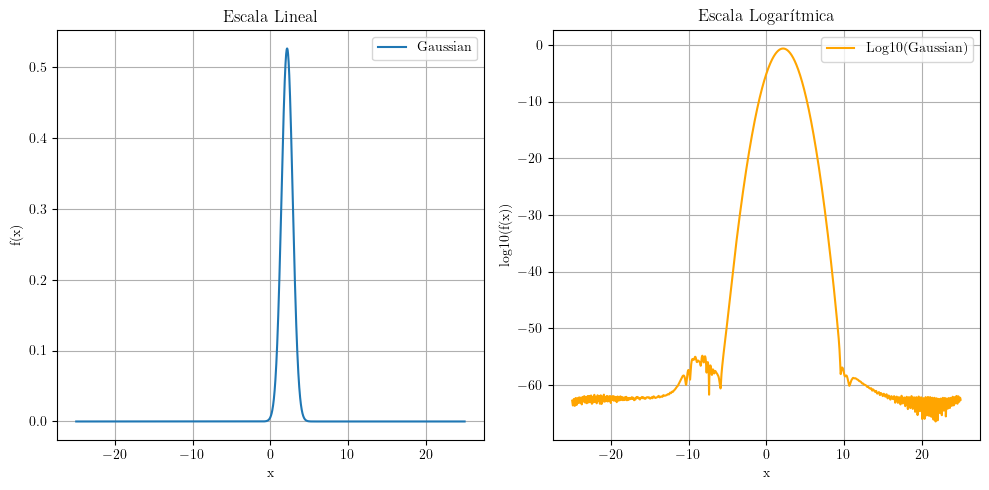

In [157]:
# Gráfica en escala lineal
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(xi, np.abs(psi)**2, label='Gaussian')
plt.title('Escala Lineal')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()

# Gráfica en escala logarítmica
plt.subplot(1, 2, 2)
y_log = np.log(np.maximum(np.abs(psi)**2, 1e-100)) 
plt.plot(xi, y_log, label='Log10(Gaussian)', color='orange')

plt.title('Escala Logarítmica')
plt.xlabel('x')
plt.ylabel('log10(f(x))')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()